# **Santander Customer Transaction Prediction**

#### Aim

To identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../input/santander-customer-transaction-prediction/train.csv')
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.93,-6.79,11.91,5.09,11.46,-9.28,5.12,18.63,...,4.44,3.96,3.14,1.69,18.52,-2.40,7.88,8.56,12.78,-1.09
1,train_1,0,11.50,-4.15,13.86,5.39,12.36,7.04,5.62,16.53,...,7.64,7.72,2.58,10.95,15.43,2.03,8.13,8.79,18.36,1.95
2,train_2,0,8.61,-2.75,12.08,7.89,10.58,-9.08,6.94,14.62,...,2.91,9.79,1.67,1.69,21.60,3.14,-6.52,8.27,14.72,0.40
3,train_3,0,11.06,-2.15,8.95,7.20,12.58,-1.84,5.84,14.93,...,4.47,4.74,0.72,1.42,23.03,-1.27,-2.93,10.29,17.97,-9.00
4,train_4,0,9.84,-1.48,12.87,6.64,12.28,2.45,5.94,19.25,...,-1.49,9.52,-0.15,9.19,13.29,-1.51,3.93,9.50,18.00,-8.81


#### Data Info

In [3]:
data.shape

(200000, 202)

<AxesSubplot:>

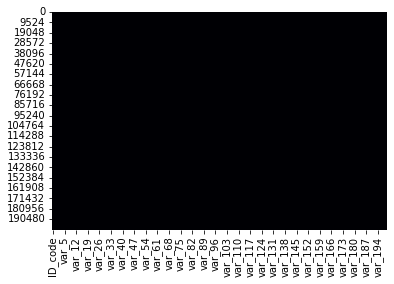

In [4]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False)

* **No null values** present in the data!

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
target,200000.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
var_0,200000.00,10.68,3.04,0.41,8.45,10.52,12.76,20.32
var_1,200000.00,-1.63,4.05,-15.04,-4.74,-1.61,1.36,10.38
var_2,200000.00,10.72,2.64,2.12,8.72,10.58,12.52,19.35
var_3,200000.00,6.80,2.04,-0.04,5.25,6.83,8.32,13.19
...,...,...,...,...,...,...,...,...
var_195,200000.00,-0.14,1.43,-5.26,-1.17,-0.17,0.83,4.27
var_196,200000.00,2.30,5.45,-14.21,-1.95,2.41,6.56,18.32
var_197,200000.00,8.91,0.92,5.96,8.25,8.89,9.59,12.00
var_198,200000.00,15.87,3.01,6.30,13.83,15.93,18.06,26.08


## Exploratory Data Analysis

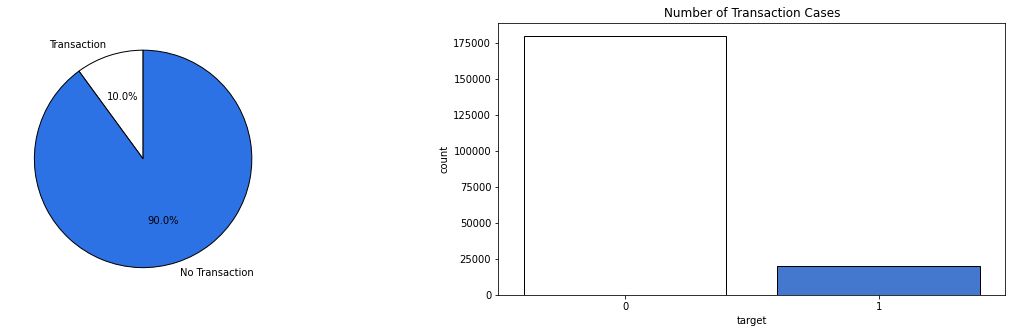

In [6]:
transaction = len(data[data['target'] == 1]) / len(data) * 100
notransaction = len(data[data['target'] == 0]) / len(data) * 100
transaction_percentage = [transaction,notransaction]
colors = ['#FFFFFF','#2C72E5']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(transaction_percentage,labels = ['Transaction','No Transaction'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
sns.countplot('target',data = data,edgecolor = 'black',palette = colors)
plt.title('Number of Transaction Cases');

## Feature Selection

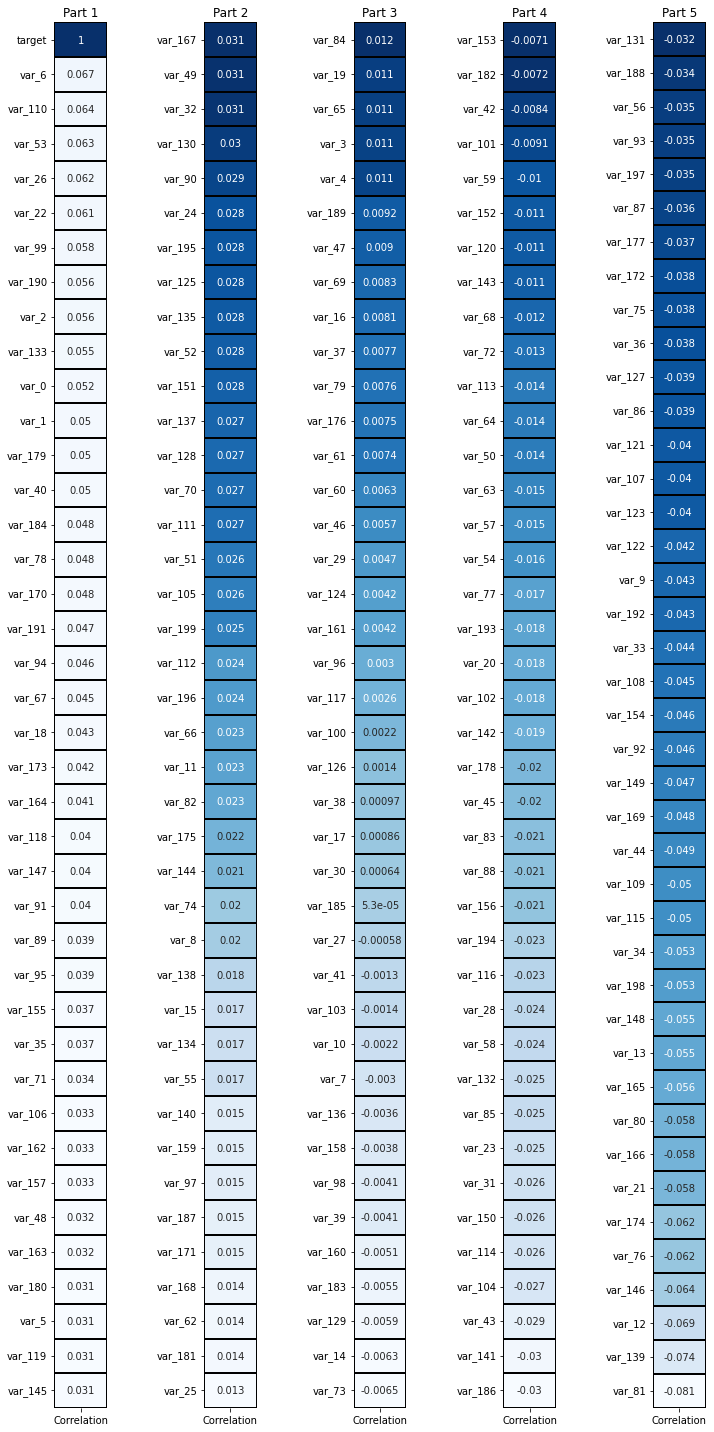

In [7]:
corr = data.corrwith(data['target']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 5,figsize = (10,20))

plt.subplot(1,5,1)
sns.heatmap(corr.iloc[:40,:],annot = True,cmap = 'Blues',linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,5,2)
sns.heatmap(corr.iloc[40:80],annot = True,cmap = 'Blues',linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

plt.subplot(1,5,3)
sns.heatmap(corr.iloc[80:120],annot = True,cmap = 'Blues',linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 3')

plt.subplot(1,5,4)
sns.heatmap(corr.iloc[120:160],annot = True,cmap = 'Blues',linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 4')

plt.subplot(1,5,5)
sns.heatmap(corr.iloc[160:201],annot = True,cmap = 'Blues',linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 5')

fig.tight_layout(w_pad = 5)

In [8]:
df = data.copy(deep = True)
df.drop(columns = list(corr.index[40:160]),inplace = True)
df = df.drop(['ID_code'], axis=1).astype('float')
df.head()

,target,var_0,var_1,var_2,var_5,var_6,var_9,var_12,var_13,var_18,...,var_177,var_179,var_180,var_184,var_188,var_190,var_191,var_192,var_197,var_198
0,0.00,8.93,-6.79,11.91,-9.28,5.12,5.75,14.01,0.57,4.28,...,13.72,1.72,-8.41,25.84,17.57,4.44,3.96,3.14,8.56,12.78
1,0.00,11.50,-4.15,13.86,7.04,5.62,8.09,14.02,8.41,7.80,...,16.57,11.08,-5.59,22.54,13.32,7.64,7.72,2.58,8.79,18.36
2,0.00,8.61,-2.75,12.08,-9.08,6.94,5.95,14.19,7.31,4.70,...,8.84,2.40,-4.29,23.09,10.19,2.91,9.79,1.67,8.27,14.72
3,0.00,11.06,-2.15,8.95,-1.84,5.84,8.24,13.85,11.97,15.94,...,13.96,5.70,-3.75,-0.46,12.41,4.47,4.74,0.72,10.29,17.97
4,0.00,9.84,-1.48,12.87,2.45,5.94,7.68,13.85,7.89,6.53,...,13.53,5.17,-7.69,11.85,16.02,-1.49,9.52,-0.15,9.50,18.00


## Data Balancing

* In order to cope with unbalanced data, there are 2 options :
  * Undersampling : Trim down the majority samples of the target variable.
  * Oversampling : Increase the minority samples of the target variable to the majority samples.
* For best performances, we will use the combination of undersampling and oversampling.
* First, we will undersample the majority samples and it is followed by oversampling minority samples.
* For data balancing, we will use imblearn.

In [9]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

Data Balancing for Model based on Correlation Plot :

In [10]:
target = data.loc[:,'target']
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.2)
f = df.iloc[:,1:].values
t = df.iloc[:,0].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f, t = pipeline.fit_resample(f, t)
Counter(target)

Counter({0: 179902, 1: 20098})

##### Calculation for Data Balancing :
* Sampling Strategy : It is a ratio which is the common paramter for oversampling and undersampling.
* Sampling Strategy : ( Samples of Minority Class ) / ( Samples of Majority Class )
* In this case,
  * Majority Class : No Fraud Cases : 179902 samples
  * Minority Class : Fraud Cases : 20098 samples
 
##### Undersampling : Trim down the majority class samples
* Sampling_Strategy = 0.2
* 0.2 = ( 492 ) / Majority Class Samples
* After undersampling,
  * Majority Class : No Fraud Cases : 100490 samples
  * Minority Class : Fraud Cases : 20098 samples
 
##### Oversampling : Increase the minority class samples
* Sampling_Strategy = 0.5
* 0.5 = ( Minority Class Samples ) / 4920
* After oversampling,
  * Majority Class : No Fraud Cases : 100490 samples
  * Minority Class : Fraud Cases : 50245 samples
 
 
* Final Class Samples :
  * Majority Class : No Fraud Cases : 100490 samples
  * Minority Class : Fraud Cases : 50245 samples


* For imbalanced datasets, we duplicate the data to deal with the potential bias in the predictions.
* Due to this duplication process, we are using synthetic data for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.
* Thus, evaluating models using accuracy will be misleading. Instead, we will go for confusion matrix, ROC-AUC graph and ROC-AUC score for model evaluation.